This notebook analyzes cytoplasmic translocation for each gene using an averaged DR value. 

In [1]:
import numpy as np
import pandas as pd
import sys, os
import matplotlib.pyplot as plt
import seaborn as sns
import scanpy as sc
from scipy.stats import *

In [2]:
drpath = '/stanley/WangLab/Connie/02.TEMPOmap/04.revisionForeskin254Gene/output'
apath = '/stanley/WangLab/Data/Processed/2022-10-15-Rena-SkinCulture254-gene/output'
adata = sc.read_h5ad(os.path.join(apath, '2022-11-12-Rena-Foreskin254gene-preflt.h5ad'))
genes = adata.var.index
area_list = [1, 2, 3, 5]
area2sample = {
    1: '2h_labeling',
    2: '2h_labeling_2h_wash',
    3: '2h_labeling_4h_wash',
    4: '20h_labeling', 
    5: '2h_labeling_6h_wash', 
    6: 'STARmap'
}

In [3]:
adata.obs

,orig_index,sample,area,x,y,z,nuclues_volume,AF546,AF546_nucleus,n_genes_by_counts,log1p_n_genes_by_counts,total_counts,log1p_total_counts,plate_number
0,0,2h_labeling,275680,63,6724,22,140797,0,0,87,4.477337,146,4.990433,1
1,1,2h_labeling,280621,63,3816,18,46370,0,0,64,4.174387,121,4.804021,1
2,2,2h_labeling,3402113,355,5604,24,313831,6,0,128,4.859812,548,6.308098,1
3,3,2h_labeling,771134,121,9836,19,191065,1,0,142,4.962845,486,6.188264,1
4,4,2h_labeling,1205013,146,5887,27,164774,0,0,68,4.234107,141,4.955827,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12569,2072,STARmap,862716,16595,12962,20,186196,0,0,118,4.779123,476,6.167516,6
12570,2073,STARmap,326678,16667,7688,19,169223,0,0,84,4.442651,181,5.204007,6
12571,2074,STARmap,309857,16658,10381,18,123123,1,0,80,4.394449,174,5.164786,6
12572,2075,STARmap,290683,16646,8342,20,51620,0,0,81,4.406719,217,5.384495,6


In [6]:
# import cell type label
cell_type = pd.read_csv('/stanley/WangLab/Connie/02.TEMPOmap/04.revisionForeskin254Gene/Nov16_skin_cluster_label_fixed.csv')
cell_type

,Unnamed: 0,orig_index,sample,area,x,y,z,nuclues_volume,AF546,AF546_nucleus,n_genes_by_counts,log1p_n_genes_by_counts,total_counts,log1p_total_counts,volume,n_volume,nCount_RNA,nFeature_RNA,RNA_snn_res.0.08,seurat_clusters
0,0,0,2h_labeling,275680,63,6724,22,140797,0,0,87,4.477337,146,4.990433,275680,140797,146,87,2,2
1,1,1,2h_labeling,280621,63,3816,18,46370,0,0,64,4.174387,121,4.804021,280621,46370,121,64,1,1
2,3,3,2h_labeling,771134,121,9836,19,191065,1,0,142,4.962845,486,6.188264,771134,191065,486,142,1,1
3,4,4,2h_labeling,1205013,146,5887,27,164774,0,0,68,4.234107,141,4.955827,1205013,164774,141,68,2,2
4,5,5,2h_labeling,1720379,164,13669,22,295120,1,0,122,4.812184,642,6.466145,1720379,295120,642,122,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8020,10492,1660,2h_labeling_6h_wash,662891,16451,2600,12,265923,3,1,50,3.931826,109,4.700480,662891,265923,109,50,0,0
8021,10493,1661,2h_labeling_6h_wash,447258,16445,5293,11,210822,1,1,46,3.850148,75,4.330733,447258,210822,75,46,0,0
8022,10494,1662,2h_labeling_6h_wash,924337,16376,6623,12,247604,1,0,72,4.290459,178,5.187386,924337,247604,178,72,0,0
8023,10495,1663,2h_labeling_6h_wash,647931,16445,14103,11,254868,0,0,56,4.043051,120,4.795791,647931,254868,120,56,0,0


In [4]:
# new cell type updated 1207
cell_type = sc.read_h5ad('/stanley/WangLab/Connie/02.TEMPOmap/04.revisionForeskin254Gene/Dec07_skin_dataset_nc_umap.h5ad')
cell_type = cell_type.obs
cell_type

/stanley/WangLab/envs/connie_TR/lib/python3.8/site-packages/anndata/compat/__init__.py:232: FutureWarning: Moving element from .uns['neighbors']['distances'] to .obsp['distances'].

This is where adjacency matrices should go now.
  warn(


,orig_index,sample,area,x,y,z,nuclues_volume,AF546,AF546_nucleus,n_genes_by_counts,...,total_counts,log1p_total_counts,volume,n_volume,nCount_RNA,nFeature_RNA,cell_id,norm_counts,RNA_snn_res.0.08,seurat_clusters
0,0,2h_labeling,275680,63,6724,22,140797,0,0,87,...,146,4.990433,275680,140797,146.0,87.0,2h_labeling_0,146.000000,2,2
1,1,2h_labeling,280621,63,3816,18,46370,0,0,64,...,121,4.804021,280621,46370,121.0,64.0,2h_labeling_1,121.000000,1,1
3,3,2h_labeling,771134,121,9836,19,191065,1,0,142,...,486,6.188264,771134,191065,486.0,142.0,2h_labeling_3,486.000000,1,1
4,4,2h_labeling,1205013,146,5887,27,164774,0,0,68,...,141,4.955827,1205013,164774,141.0,68.0,2h_labeling_4,141.000000,2,2
5,5,2h_labeling,1720379,164,13669,22,295120,1,0,122,...,642,6.466145,1720379,295120,642.0,122.0,2h_labeling_5,642.000000,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10492,1660,2h_labeling_6h_wash,662891,16451,2600,12,265923,3,1,50,...,109,4.700480,662891,265923,109.0,50.0,2h_labeling_6h_wash_1660,83.929468,0,0
10493,1661,2h_labeling_6h_wash,447258,16445,5293,11,210822,1,1,46,...,75,4.330733,447258,210822,75.0,46.0,2h_labeling_6h_wash_1661,57.749634,0,0
10494,1662,2h_labeling_6h_wash,924337,16376,6623,12,247604,1,0,72,...,178,5.187386,924337,247604,178.0,72.0,2h_labeling_6h_wash_1662,137.059131,0,0
10495,1663,2h_labeling_6h_wash,647931,16445,14103,11,254868,0,0,56,...,120,4.795791,647931,254868,120.0,56.0,2h_labeling_6h_wash_1663,92.399414,0,0


In [5]:
# calculate dr_by_sample (each gene has one averaged DR per sample)
for area in area_list: # 2-6 excluding starmap, 20h
    # _adata = adata[adata.obs['sample']==area]
    dr = np.load(os.path.join(drpath, f'DR_area{area}.npy'), allow_pickle=True)
    avg_dr = np.zeros(dr.shape) # cell by gene 
    for i in range(dr.shape[0]):
        for j in range(dr.shape[1]):
            if type(dr[i,j]) == list:
                avg_dr[i,j] = np.average(dr[i,j])
            else: avg_dr[i,j] = np.nan 
    # filter cells (cell meta by Haowen)
    _cell_type = cell_type[cell_type['sample']==area2sample[area]]
    avg_dr_flt = avg_dr[np.isin(adata.obs[adata.obs['plate_number']==area]['orig_index'], _cell_type['orig_index'])]
    # separate cells by type
    ctype = _cell_type['seurat_clusters']
    avg_dr_melanocyte = avg_dr_flt[ctype==0]
    avg_dr_fibroblast = avg_dr_flt[ctype==1]
    avg_dr_keratinocyte = avg_dr_flt[ctype==2]

    sample_dr_melanocyte = np.nanmean(avg_dr_melanocyte, axis=0)
    sample_dr_fibroblast = np.nanmean(avg_dr_fibroblast, axis=0)
    sample_dr_keratinocyte = np.nanmean(avg_dr_keratinocyte, axis=0)

    if area == 1: 
        dr_by_sample = pd.DataFrame(zip(genes, sample_dr_melanocyte, [area2sample[area]]*(len(genes)), ['melanocyte']*(len(genes))))
        dr_by_sample = pd.concat([dr_by_sample, pd.DataFrame(zip(genes, sample_dr_fibroblast, [area2sample[area]]*(len(genes)), ['fibroblast']*(len(genes))))], axis=0)
        dr_by_sample = pd.concat([dr_by_sample, pd.DataFrame(zip(genes, sample_dr_keratinocyte, [area2sample[area]]*(len(genes)), ['keratinocyte']*(len(genes))))], axis=0)
    else: 
        dr_by_sample = pd.concat([dr_by_sample, pd.DataFrame(zip(genes, sample_dr_melanocyte, [area2sample[area]]*(len(genes)), ['melanocyte']*(len(genes))))], axis=0)
        dr_by_sample = pd.concat([dr_by_sample, pd.DataFrame(zip(genes, sample_dr_fibroblast, [area2sample[area]]*(len(genes)), ['fibroblast']*(len(genes))))], axis=0)
        dr_by_sample = pd.concat([dr_by_sample, pd.DataFrame(zip(genes, sample_dr_keratinocyte, [area2sample[area]]*(len(genes)), ['keratinocyte']*(len(genes))))], axis=0)

dr_by_sample.columns = ['gene', 'dr', 'sample', 'cell_type']

/local/scratch/37696819.1.interactive/ipykernel_263040/2356532907.py:22: RuntimeWarning: Mean of empty slice
  sample_dr_keratinocyte = np.nanmean(avg_dr_keratinocyte, axis=0)
/local/scratch/37696819.1.interactive/ipykernel_263040/2356532907.py:22: RuntimeWarning: Mean of empty slice
  sample_dr_keratinocyte = np.nanmean(avg_dr_keratinocyte, axis=0)


In [6]:
dr_by_sample

,gene,dr,sample,cell_type
0,ACTA2,0.662902,2h_labeling,melanocyte
1,ACTB,0.732390,2h_labeling,melanocyte
2,ADGRE1,0.659378,2h_labeling,melanocyte
3,ADIPOQ,0.628104,2h_labeling,melanocyte
4,AHNAK,0.688451,2h_labeling,melanocyte
...,...,...,...,...
249,UBA52,0.676881,2h_labeling_6h_wash,keratinocyte
250,VEGFA,0.657653,2h_labeling_6h_wash,keratinocyte
251,VIM,0.727511,2h_labeling_6h_wash,keratinocyte
252,VSIG4,0.699786,2h_labeling_6h_wash,keratinocyte


<AxesSubplot:ylabel='Count'>

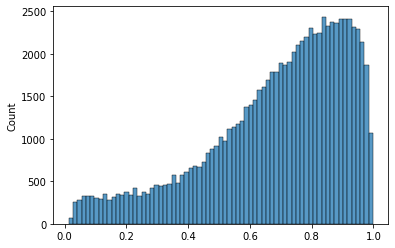

In [7]:
sns.histplot(avg_dr.flatten())

<AxesSubplot:xlabel='dr', ylabel='Count'>

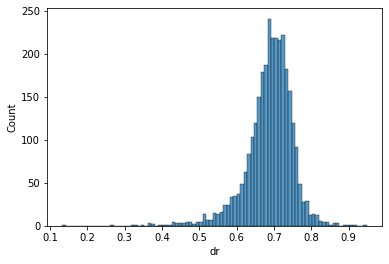

In [8]:
sns.histplot(dr_by_sample['dr'])

In [9]:
np.count_nonzero(np.isnan(dr_by_sample['dr']))

3

In [10]:
# sample to timepoints
area2tp = {
    '2h_labeling': 0, 
    '2h_labeling_2h_wash': 2, 
    '2h_labeling_4h_wash': 4,
    '2h_labeling_6h_wash': 6
}
tp = []
for i in range(len(dr_by_sample)):
    tp.append(area2tp[dr_by_sample.iloc[i]['sample']]) 
dr_by_sample['time_points'] = tp

In [11]:
dr_by_sample.sort_values(by='time_points', inplace=True)
dr_by_sample

,gene,dr,sample,cell_type,time_points
0,ACTA2,0.662902,2h_labeling,melanocyte,0
249,UBA52,0.755559,2h_labeling,fibroblast,0
250,VEGFA,0.633005,2h_labeling,fibroblast,0
251,VIM,0.741591,2h_labeling,fibroblast,0
252,VSIG4,0.660019,2h_labeling,fibroblast,0
...,...,...,...,...,...
2,ADGRE1,0.752019,2h_labeling_6h_wash,fibroblast,6
3,ADIPOQ,0.773726,2h_labeling_6h_wash,fibroblast,6
4,AHNAK,0.734966,2h_labeling_6h_wash,fibroblast,6
249,UBA52,0.665698,2h_labeling_6h_wash,melanocyte,6


In [12]:
# regress
## test
test = 'ACTA2'
x = dr_by_sample[np.logical_and(dr_by_sample['gene']==test, dr_by_sample['cell_type']=='fibroblast')]['time_points']
y = dr_by_sample[np.logical_and(dr_by_sample['gene']==test, dr_by_sample['cell_type']=='fibroblast')]['dr']
reg_test = linregress(x, y)
print(x, y, reg_test)

0    0
0    2
0    4
0    6
Name: time_points, dtype: int64 0    0.685783
0    0.742363
0    0.774582
0    0.758141
Name: dr, dtype: float64 LinregressResult(slope=0.012464649918853422, intercept=0.7028231471588797, rvalue=0.8337721686209401, pvalue=0.16622783137905991, stderr=0.005836362407403911, intercept_stderr=0.021837668513552587)


In [13]:
## all genes
LR = []
for gene in genes:
    x1 = dr_by_sample[np.logical_and(dr_by_sample['gene']==gene, dr_by_sample['cell_type']=='melanocyte')]['time_points']
    y1 = dr_by_sample[np.logical_and(dr_by_sample['gene']==gene, dr_by_sample['cell_type']=='melanocyte')]['dr']
    reg1 = linregress(x1, y1)
    x2 = dr_by_sample[np.logical_and(dr_by_sample['gene']==gene, dr_by_sample['cell_type']=='fibroblast')]['time_points']
    y2 = dr_by_sample[np.logical_and(dr_by_sample['gene']==gene, dr_by_sample['cell_type']=='fibroblast')]['dr']
    reg2 = linregress(x2, y2)
    x3 = dr_by_sample[np.logical_and(dr_by_sample['gene']==gene, dr_by_sample['cell_type']=='keratinocyte')]['time_points']
    y3 = dr_by_sample[np.logical_and(dr_by_sample['gene']==gene, dr_by_sample['cell_type']=='keratinocyte')]['dr']
    reg3 = linregress(x3, y3)
    LR.append([gene, reg1.slope, reg1.rvalue**2, reg2.slope, reg2.rvalue**2, reg3.slope, reg3.rvalue**2])
df = pd.DataFrame(LR, columns=['gene', 'slope_melanocyte', 'r^2_melanocyte', 'slope_fibroblast', 'r^2_fibroblast', 'slope_keratinocyte', 'r^2_keratinocyte'])
df

,gene,slope_melanocyte,r^2_melanocyte,slope_fibroblast,r^2_fibroblast,slope_keratinocyte,r^2_keratinocyte
0,ACTA2,0.001210,0.002505,0.012465,0.695176,0.023044,0.306139
1,ACTB,-0.007311,0.861555,-0.004257,0.423065,-0.007039,0.938193
2,ADGRE1,-0.000013,0.000002,-0.005516,0.311142,0.015668,0.608551
3,ADIPOQ,0.015419,0.999515,0.023495,0.745307,0.029603,0.684382
4,AHNAK,0.000084,0.000153,0.003390,0.293057,0.002032,0.221077
...,...,...,...,...,...,...,...
249,UBA52,-0.008706,0.769949,-0.005661,0.605503,-0.010506,0.746854
250,VEGFA,-0.001321,0.010064,0.019361,0.498069,-0.001785,0.027352
251,VIM,-0.002876,0.187267,-0.002067,0.067462,-0.002173,0.060176
252,VSIG4,0.000028,0.000005,0.011256,0.660671,0.009428,0.582988


In [16]:
df.to_csv(os.path.join(drpath, 'Foreskin_dr_regression_byCellType_flt_1207.csv'))

<AxesSubplot:ylabel='Count'>

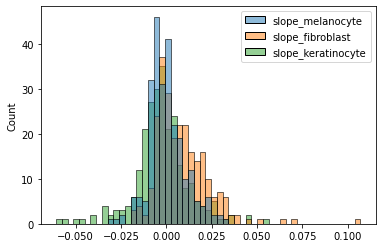

In [17]:
sns.histplot([df['slope_melanocyte'], df['slope_fibroblast'], df['slope_keratinocyte']])